In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [79]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
#X['tf'] = X['ppltrst'] + X['pplfair'] 
#X['hh'] = X['happy'] + X['pplhlp']

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [80]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance',
          'subsample': 0.9}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.018821603927986905
Percent Type II errors: 0.11115657392253137

Test set accuracy:
Percent Type I errors: 0.09570552147239264
Percent Type II errors: 0.17177914110429449


In statistical hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis (a "false positive"), while a type II error is incorrectly retaining a false null hypothesis (a "false negative").

Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

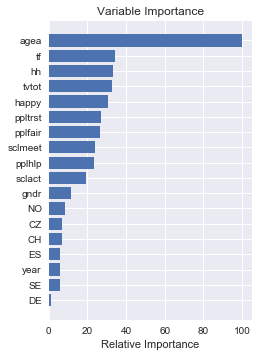

In [78]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [38]:
# max depth = 5+ improves the training set accuracy but is worse for test set (overfitting); 4 is pretty good
# loss function = exponential doesn't change anything
# more iterations = more error/overfitting
# subsample <0.9 is worse but 0.9 is better than 1.0 (default)

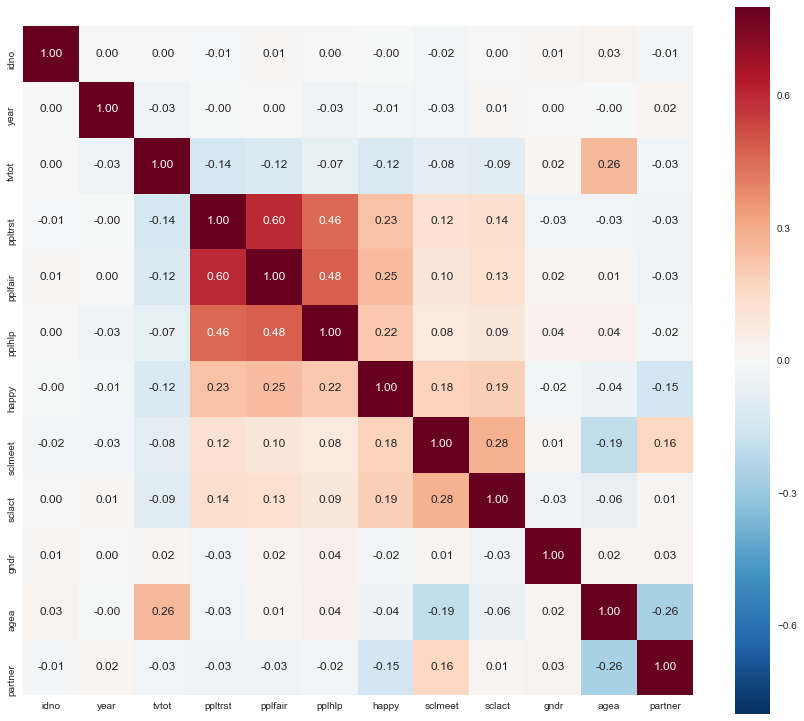

In [46]:
import seaborn as sns; sns.set()

corrmat = df.corr() 
f, ax = plt.subplots(figsize=(15, 13))
# Draw the heatmap using seaborn to see what is correlated 
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

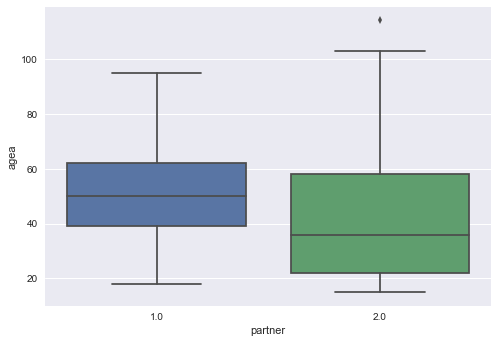

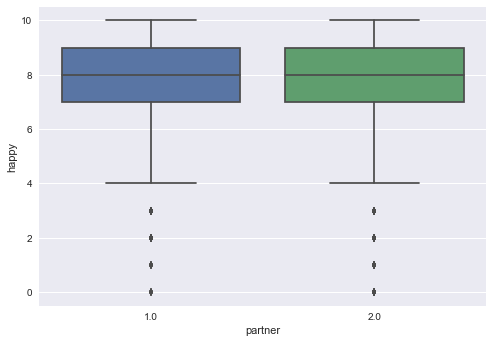

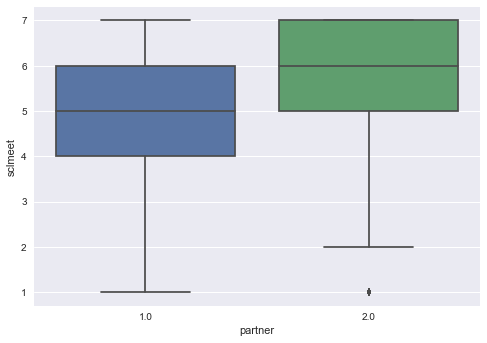

In [58]:
sns.boxplot(x="partner", y="agea", data=df)
plt.show()
sns.boxplot(x="partner", y="happy", data=df)
plt.show()
sns.boxplot(x="partner", y="sclmeet", data=df)
plt.show()

### NORMALIZE VARIABLES

In [96]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]


X = (X - X.mean()) / (X.max() - X.min())
#X_train_norm = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
#X_test_norm = (X_test - X_test.mean()) / (X_test.max() - X_test.min())


In [97]:
# Make the categorical variable 'country' into dummies.
X= pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [98]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance',
          'subsample': 0.9}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.019094380796508457
Percent Type II errors: 0.10938352427714129

Test set accuracy:
Percent Type I errors: 0.09447852760736196
Percent Type II errors: 0.18650306748466258


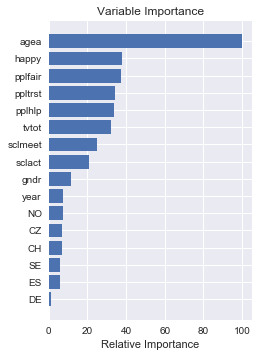

In [99]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [100]:
X_train

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,-0.500307,-0.116941,-0.257494,0.399484,-0.032147,0.029152,-0.035985,0.311004,0.503621,0.128665,1,0,0,0,0,0
1,-0.500307,0.311631,-0.057494,0.099484,-0.032147,0.129152,-0.369318,-0.188996,0.503621,0.118564,1,0,0,0,0,0
2,-0.500307,-0.402655,0.242506,0.199484,0.267853,-0.070848,0.130682,0.061004,-0.496379,-0.234972,1,0,0,0,0,0
3,-0.500307,0.025917,0.042506,-0.000516,0.167853,0.229152,0.130682,-0.188996,0.503621,0.169069,1,0,0,0,0,0
4,-0.500307,0.168774,0.042506,0.099484,-0.032147,0.029152,0.297349,-0.188996,0.503621,0.078160,1,0,0,0,0,0
6,-0.500307,-0.116941,-0.557494,-0.100516,-0.332147,-0.770848,-0.535985,-0.188996,-0.496379,0.290281,1,0,0,0,0,0
7,-0.500307,-0.259798,-0.157494,-0.100516,-0.232147,0.229152,-0.035985,-0.188996,0.503621,-0.174365,1,0,0,0,0,0
8,-0.500307,-0.259798,0.242506,0.199484,0.267853,0.129152,0.130682,0.311004,0.503621,0.371089,1,0,0,0,0,0
9,-0.500307,0.025917,-0.157494,-0.200516,0.267853,-0.070848,-0.202651,-0.188996,0.503621,0.148867,1,0,0,0,0,0
10,-0.500307,-0.402655,0.042506,0.099484,0.167853,0.129152,-0.035985,-0.188996,0.503621,-0.144062,1,0,0,0,0,0
